In [1]:
import os, glob, json, csv, subprocess, sys, re
from git import *
from subprocess import Popen, PIPE
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as ply
import plotly
from plotly.offline import plot, init_notebook_mode, iplot

%matplotlib inline

# Defining repository

In [2]:
userhome = os.path.expanduser('~')
repository = os.path.dirname(userhome + r'/local-repo/')

# Define function to apply git command

In [3]:
def execute_command(cmd, work_dir):
    """Executes a shell command in a subprocess, waiting until it has completed.
 
    :param cmd: Command to execute.
    :param work_dir: Working directory path.
    """
    pipe = subprocess.Popen(cmd, shell=True, cwd=work_dir, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out, error) = pipe.communicate()
    return out, error
    pipe.wait()

In [4]:
def execute_shell_command(id1, id2, cmd, work_dir):
    """Executes a shell command in a subprocess, waiting until it has completed.
 
    :param cmd: Command to execute.
    :param work_dir: Working directory path.
    """
    pipe = subprocess.Popen(cmd, shell=True, cwd=work_dir, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out, error) = pipe.communicate()
    return id1, id2, out, error
    pipe.wait()

# Listing all files in repository and save it in textfile

In [5]:
listfile = []
for filename in glob.iglob(userhome + r'/local-repo/**/*.*', recursive=True):
    listfile.append(filename)

In [6]:
with open ("file_list.txt", mode="wt", encoding="utf-8") as mytxt:
    mytxt.write('\n'.join(listfile))
print ("File file_list.txt has been created")
print ("Number of files found: %i" % (len(listfile)) + " files")

File file_list.txt has been created
Number of files found: 34 files


# Extracting Commit ID

In [7]:
command = "git log --pretty='%H'"
com_ID = str(execute_command(command, repository)).replace("b'",'').replace("'",'').replace('\\n',' ').replace("(",'').replace(")",'').replace(",",'').split(' ')

# Applying git diff -w --diff-algorithm=histogram --stat commitID_1 commitID2 filepath

In [8]:
diff_cmd = "git diff -w --diff-algorithm=histogram --stat 158aa4b 84062b3 " + repository + "/analyze/analyze_localrepo.ipynb"
diffhist = (str(execute_command(diff_cmd, repository)).
            replace("b'",'').replace("'",'').replace("\\n",'').replace("(",'').
            replace(")",'').replace("|",' ').replace("+",'').replace("-",'').
            replace("file changed","files changed").replace("insertion,","insertions,").replace("deletion,","deletions,"))
diffhist

' analyze/analyze_localrepo.ipynb   667  1 files changed, 569 insertions, 98 deletions, '

# Applying git diff -w --diff-algorithm=histogram --stat commitID_1 commitID2 

In [9]:
diffhist = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rApplying diff between commits = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff -w --diff-algorithm=histogram --stat " + com_ID[i+1] + " " + com_ID[i]
    tmp = (str(execute_shell_command(com_ID[i+1], com_ID[i], diff_cmd, repository)).replace("(",'').replace("+",'').
           replace("-",'').replace("\\n",'').replace("b'",'').replace("(+)",'').replace("(-)",'').replace(")",'').
           replace("|",'').replace(" => ",'=>').replace("... ",'...').replace("...> ",'...>').
           replace("...=> ",'...=>').replace(" Code ","Code"))
    tmp = re.sub("([a-z])" and "([ ])", r"\1,", tmp)
    tmp2 = (str(tmp).replace("\'",'').replace(", ",'').replace(",files",'files').replace(",changed","changed").
                    replace(",file",'files').replace(",insertions",'insertions').
                    replace(",insertion",'insertions').replace(",deletions,",'deletions').
                    replace(",deletion,",'deletions').replace(" ",''))
    diffhist.append(str(tmp2))
    
diffhistresult = []
for item in diffhist:
    if item == ', ':
        del item
    else:
        diffhistresult.append(item)

#diffhistresult

Applying diff between commits = 60 out of 60

In [10]:
print(diffhistresult[0])
print("\n"+diffhistresult[5])
print("\n"+diffhistresult[10])
print("\n"+diffhistresult[30])
print("\n"+diffhistresult[25])

158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,.../analyze_localrepocheckpoint.ipynb,668,analyze/analyze_localrepo.ipynb,667,analyze/dir_list.txt,1,analyze/metrics1.csv,1,analyze/metrics2.csv,1,analyze/metrics3.csv,1,analyze/metrics4.csv,1,analyze/metrics_sum.csv,4,analyze/numberofline.csv,9,listOfFiles,26,10fileschanged,1181insertions,198deletions

45369260645bb2794951c6051baa73bea231b353,c981d0d7e473e752c01f70c157d2a4589270bde,text/potential_research_for_gradstudents.txt,2,1fileschanged,1insertions,1deletions

2788feb014b0d90b0aa8370fc42e408bead7f16a,5f2562e711475b691fede58715f1827f35d4561a,text/potential_research_for_gradstudents.txt,2,1fileschanged,2insertions,

50574980dcc58889e7f58cc77c64306c069170a4,fc0cc5006524e1b1f01f374c7066629dcc502674,text/installer.txt,1,1fileschanged,1deletions

a34b3f8b22783cf748d8ec99b651ddf35204d40c,baa6cb4298d90db1c375c63ee28733eb144b7266,CommitTest.txt=>text/CommitTest.txt,0,README.md=>text/README.md,0,2fileschanged

In [11]:
diffhistres = []
for x in range(0,len(diffhistresult)-1):
    line = diffhistresult[x]
    if "changed" not in diffhistresult[x]:
        pass
    else:
        if "deletions" not in diffhistresult[x]:
            diffhistres.append(line + '0 deletions')
        else:
            if "insertions" not in diffhistresult[x]:
                index = line.find('changed,')
                diffhistres.append(line[:index+8] + '0 insertions' + line[index+7:])
            else:
                diffhistres.append(diffhistresult[x])

In [12]:
print(diffhistres[0])
print("\n"+diffhistres[5])
print("\n"+diffhistres[10])
print("\n"+diffhistres[30])
print("\n"+diffhistres[25])
#diffhistres

158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,.../analyze_localrepocheckpoint.ipynb,668,analyze/analyze_localrepo.ipynb,667,analyze/dir_list.txt,1,analyze/metrics1.csv,1,analyze/metrics2.csv,1,analyze/metrics3.csv,1,analyze/metrics4.csv,1,analyze/metrics_sum.csv,4,analyze/numberofline.csv,9,listOfFiles,26,10fileschanged,1181insertions,198deletions

45369260645bb2794951c6051baa73bea231b353,c981d0d7e473e752c01f70c157d2a4589270bde,text/potential_research_for_gradstudents.txt,2,1fileschanged,1insertions,1deletions

2788feb014b0d90b0aa8370fc42e408bead7f16a,5f2562e711475b691fede58715f1827f35d4561a,text/potential_research_for_gradstudents.txt,2,1fileschanged,2insertions,0 deletions

50574980dcc58889e7f58cc77c64306c069170a4,fc0cc5006524e1b1f01f374c7066629dcc502674,text/installer.txt,1,1fileschanged,0 insertions,1deletions

a34b3f8b22783cf748d8ec99b651ddf35204d40c,baa6cb4298d90db1c375c63ee28733eb144b7266,CommitTest.txt=>text/CommitTest.txt,0,README.md=>text/R

In [13]:
klhist = []
reshist = []
for x in range(0, len(diffhistres)-1):
    klhist = diffhistres[x].split(',')
    reshist.append(klhist)
#for it in reshist:
#    print(it)

In [14]:
temp1hist = []
for b in range(0,len(reshist)-1):
    temp2hist = []
    for c in range(0,len(reshist[b])-3):
        temp2hist.append(reshist[b][c])
    temp1hist.append(temp2hist)
temp1hist

[['158aa4b03e61e40bbbd187bea38946d9ca2d9a49',
  '84062b3557af3a68d9ff1b72cfbc4adf2f481149',
  '.../analyze_localrepocheckpoint.ipynb',
  '668',
  'analyze/analyze_localrepo.ipynb',
  '667',
  'analyze/dir_list.txt',
  '1',
  'analyze/metrics1.csv',
  '1',
  'analyze/metrics2.csv',
  '1',
  'analyze/metrics3.csv',
  '1',
  'analyze/metrics4.csv',
  '1',
  'analyze/metrics_sum.csv',
  '4',
  'analyze/numberofline.csv',
  '9',
  'listOfFiles',
  '26'],
 ['2e8a4c19cd62775706dd8345d4f50b2b13be1737',
  '158aa4b03e61e40bbbd187bea38946d9ca2d9a49',
  '.../analyze_localrepocheckpoint.ipynb',
  '581',
  'analyze/analyze_localrepo.ipynb',
  '581',
  'analyze/metrics1.csv',
  '1',
  'analyze/metrics2.csv',
  '1',
  'analyze/metrics3.csv',
  '1',
  'analyze/metrics4.csv',
  '1',
  'analyze/metrics_sum.csv',
  '4'],
 ['f98a740ad735425d5b9b95735e9ebb82128da508',
  '2e8a4c19cd62775706dd8345d4f50b2b13be1737',
  '.../analyze_localrepocheckpoint.ipynb',
  '1432',
  'analyze/analyze_localrepo.ipynb',
  '14

In [15]:
s = (len(temp1hist[0])-2)/2
int(s)

10

In [16]:
temp1hist

[['158aa4b03e61e40bbbd187bea38946d9ca2d9a49',
  '84062b3557af3a68d9ff1b72cfbc4adf2f481149',
  '.../analyze_localrepocheckpoint.ipynb',
  '668',
  'analyze/analyze_localrepo.ipynb',
  '667',
  'analyze/dir_list.txt',
  '1',
  'analyze/metrics1.csv',
  '1',
  'analyze/metrics2.csv',
  '1',
  'analyze/metrics3.csv',
  '1',
  'analyze/metrics4.csv',
  '1',
  'analyze/metrics_sum.csv',
  '4',
  'analyze/numberofline.csv',
  '9',
  'listOfFiles',
  '26'],
 ['2e8a4c19cd62775706dd8345d4f50b2b13be1737',
  '158aa4b03e61e40bbbd187bea38946d9ca2d9a49',
  '.../analyze_localrepocheckpoint.ipynb',
  '581',
  'analyze/analyze_localrepo.ipynb',
  '581',
  'analyze/metrics1.csv',
  '1',
  'analyze/metrics2.csv',
  '1',
  'analyze/metrics3.csv',
  '1',
  'analyze/metrics4.csv',
  '1',
  'analyze/metrics_sum.csv',
  '4'],
 ['f98a740ad735425d5b9b95735e9ebb82128da508',
  '2e8a4c19cd62775706dd8345d4f50b2b13be1737',
  '.../analyze_localrepocheckpoint.ipynb',
  '1432',
  'analyze/analyze_localrepo.ipynb',
  '14

In [17]:
temp1hist[25]

['a34b3f8b22783cf748d8ec99b651ddf35204d40c',
 'baa6cb4298d90db1c375c63ee28733eb144b7266',
 'CommitTest.txt=>text/CommitTest.txt',
 '0',
 'README.md=>text/README.md',
 '0']

In [18]:
with open('diffhistogram.csv', 'w') as csvfile:
    header = ['commitID_1', 'commitID_2', 'filename', '#line_changed']
    writers = csv.writer(csvfile, delimiter=',')
    writers.writerow(header)
    for cmp in range(0,len(temp1hist)-1):
        x = 2
        y = 4
        if len(temp1hist[cmp])<=4:
            writers.writerow(temp1hist[cmp])
        else:
            s = (len(temp1hist[cmp])-2)/2
            for g in range(1, int(s)):
                v = []
                for col1 in range(0,2):
                    v.append(temp1hist[cmp][col1])
                for col2 in range(x,y):
                    if re.findall(r'\d+',temp1hist[cmp][col2]) == True:
                        v.append(re.findall(r'\d+',temp1hist[cmp][col2]))
                    else:
                        v.append(temp1hist[cmp][col2])
                x = x + 2
                y = y + 2
                writers.writerow(v)

In [19]:
datahist = pd.read_csv("diffhistogram.csv")
sc = datahist[header]
sc.head()

,commitID_1,commitID_2,filename,#line_changed
0,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,.../analyze_localrepocheckpoint.ipynb,668
1,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,analyze/analyze_localrepo.ipynb,667
2,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,analyze/dir_list.txt,1
3,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,analyze/metrics1.csv,1
4,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,analyze/metrics2.csv,1


In [20]:
w = datahist["#line_changed"]
summ = 0
for jj in range(0,len(w)-1):
    if str(w[jj]).isdigit() == True:
        summ = summ + int(w[jj])
    else:
        summ = summ
summ

5988

In [21]:
dfhist = pd.read_csv('diffhistogram.csv')
dfhist = (pd.to_numeric(dfhist['#line_changed'], errors='coerce')
       .groupby(dfhist['filename'])
       .sum()
       .to_frame()
       .add_prefix('SUM ')
       .reset_index())

col = ['filename','SUM #line_changed']
dfhist = dfhist.dropna(subset=['SUM #line_changed'])

dfhist[col].to_csv('diffhistfilechanged.csv')
out = pd.read_csv('diffhistfilechanged.csv')
saved = out[col]
saved.head()

,filename,SUM #line_changed
0,.../analyze_localrepocheckpoint.ipynb,2681.0
1,CommitTest.txt=>text/CommitTest.txt,0.0
2,README.md,8.0
3,analyze/analyze_localrepo.ipynb,2680.0
4,analyze/dir_list.txt,7.0


Text(0,0.5,'Number of lines')

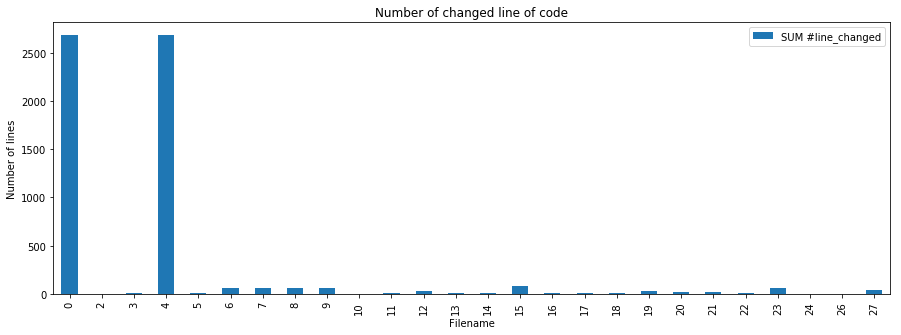

In [22]:
mygraph = dfhist.plot(figsize=(15,5), kind='bar', title = 'Number of changed line of code')
mygraph.set_xlabel("Filename")
mygraph.set_ylabel("Number of lines")

In [23]:
trace1 = go.Bar(
    x=dfhist['filename'],
    y=dfhist['SUM #line_changed'],
    name='--diff-algorithm=histogram'
)

trace2 = go.Scatter(
    x=dfhist['filename'],
    y=dfhist['SUM #line_changed'],
    name='--diff-algorithm=histogram'
)

dt = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

init_notebook_mode(connected=True)
fig = go.Figure(data=dt, layout=layout)
iplot(fig, show_link=False)

# Applying git diff -w --diff-algorithm=myers --stat commitID_1 commitID2 

In [24]:
diffmyers = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rApplying diff between commits = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff -w --diff-algorithm=myers --stat " + com_ID[i+1] + " " + com_ID[i]
    tmp = (str(execute_shell_command(com_ID[i+1], com_ID[i], diff_cmd, repository)).replace("(",'').replace("+",'').
           replace("-",'').replace("\\n",'').replace("b'",'').replace("(+)",'').replace("(-)",'').replace(")",'').
           replace("|",'').replace(" => ",'=>').replace("... ",'...').replace("...> ",'...>').
           replace("...=> ",'...=>').replace(" Code ","Code"))
    tmp = re.sub("([a-z])" and "([ ])", r"\1,", tmp)
    tmp2 = (str(tmp).replace("\'",'').replace(", ",'').replace(",files",'files').replace(",changed","changed").
                    replace(",file",'files').replace(",insertions",'insertions').
                    replace(",insertion",'insertions').replace(",deletions,",'deletions').
                    replace(",deletion,",'deletions').replace(" ",''))
    diffmyers.append(str(tmp2))
    
diffmyersresult = []
for item in diffmyers:
    if item == ', ':
        del item
    else:
        diffmyersresult.append(item)

Applying diff between commits = 60 out of 60

In [25]:
diffmyersres = []
for x in range(0,len(diffmyersresult)-1):
    line = diffmyersresult[x]
    if "changed" not in diffmyersresult[x]:
        pass
    else:
        if "deletions" not in diffmyersresult[x]:
            diffmyersres.append(line + '0 deletions')
        else:
            if "insertions" not in diffmyersresult[x]:
                index = line.find('changed,')
                diffmyersres.append(line[:index+8] + '0 insertions' + line[index+7:])
            else:
                diffmyersres.append(diffmyersresult[x])

In [26]:
klmyers = []
resmyers = []
for x in range(0, len(diffmyersres)-1):
    klmyers = diffmyersres[x].split(',')
    resmyers.append(klmyers)
#for it in resmyers:
#    print(it)

In [27]:
temp1myers = []
for b in range(0,len(resmyers)-1):
    temp2myers = []
    for c in range(0,len(resmyers[b])-3):
        temp2myers.append(resmyers[b][c])
    temp1myers.append(temp2myers)
temp1myers

[['158aa4b03e61e40bbbd187bea38946d9ca2d9a49',
  '84062b3557af3a68d9ff1b72cfbc4adf2f481149',
  '.../analyze_localrepocheckpoint.ipynb',
  '668',
  'analyze/analyze_localrepo.ipynb',
  '667',
  'analyze/dir_list.txt',
  '1',
  'analyze/metrics1.csv',
  '1',
  'analyze/metrics2.csv',
  '1',
  'analyze/metrics3.csv',
  '1',
  'analyze/metrics4.csv',
  '1',
  'analyze/metrics_sum.csv',
  '4',
  'analyze/numberofline.csv',
  '9',
  'listOfFiles',
  '26'],
 ['2e8a4c19cd62775706dd8345d4f50b2b13be1737',
  '158aa4b03e61e40bbbd187bea38946d9ca2d9a49',
  '.../analyze_localrepocheckpoint.ipynb',
  '581',
  'analyze/analyze_localrepo.ipynb',
  '581',
  'analyze/metrics1.csv',
  '1',
  'analyze/metrics2.csv',
  '1',
  'analyze/metrics3.csv',
  '1',
  'analyze/metrics4.csv',
  '1',
  'analyze/metrics_sum.csv',
  '4'],
 ['f98a740ad735425d5b9b95735e9ebb82128da508',
  '2e8a4c19cd62775706dd8345d4f50b2b13be1737',
  '.../analyze_localrepocheckpoint.ipynb',
  '1432',
  'analyze/analyze_localrepo.ipynb',
  '14

In [28]:
with open('diffmyers.csv', 'w') as csvfile:
    header = ['commitID_1', 'commitID_2', 'filename', '#line_changed']
    writers = csv.writer(csvfile, delimiter=',')
    writers.writerow(header)
    for cmp in range(0,len(temp1myers)-1):
        x = 2
        y = 4
        if len(temp1myers[cmp])<=4:
            writers.writerow(temp1myers[cmp])
        else:
            s = (len(temp1myers[cmp])-2)/2
            for g in range(1, int(s)):
                v = []
                for col1 in range(0,2):
                    v.append(temp1myers[cmp][col1])
                for col2 in range(x,y):
                    if re.findall(r'\d+',temp1myers[cmp][col2]) == True:
                        v.append(re.findall(r'\d+',temp1myers[cmp][col2]))
                    else:
                        v.append(temp1myers[cmp][col2])
                x = x + 2
                y = y + 2
                writers.writerow(v)

In [29]:
datamyers = pd.read_csv("diffmyers.csv")
sc = datamyers[header]
sc.head()

,commitID_1,commitID_2,filename,#line_changed
0,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,.../analyze_localrepocheckpoint.ipynb,668
1,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,analyze/analyze_localrepo.ipynb,667
2,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,analyze/dir_list.txt,1
3,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,analyze/metrics1.csv,1
4,158aa4b03e61e40bbbd187bea38946d9ca2d9a49,84062b3557af3a68d9ff1b72cfbc4adf2f481149,analyze/metrics2.csv,1


In [30]:
dfmyers = pd.read_csv('diffmyers.csv')
dfmyers = (pd.to_numeric(dfmyers['#line_changed'], errors='coerce')
       .groupby(dfmyers['filename'])
       .sum()
       .to_frame()
       .add_prefix('SUM ')
       .reset_index())

col = ['filename','SUM #line_changed']
dfmyers = dfmyers.dropna(subset=['SUM #line_changed'])

dfmyers[col].to_csv('diffmyersfilechanged.csv')
out = pd.read_csv('diffmyersfilechanged.csv')
saved = out[col]
saved.head()

,filename,SUM #line_changed
0,.../analyze_localrepocheckpoint.ipynb,2681.0
1,CommitTest.txt=>text/CommitTest.txt,0.0
2,README.md,8.0
3,analyze/analyze_localrepo.ipynb,2680.0
4,analyze/dir_list.txt,7.0


In [34]:
trace3 = go.Bar(
    x=dfmyers['filename'],
    y=dfmyers['SUM #line_changed'],
    name='--diff-algorithm=myers'
)

trace4 = go.Scatter(
    x=dfmyers['filename'],
    y=dfmyers['SUM #line_changed'],
    name='--diff-algorithm=myers'
)

dt = [trace1, trace3]
layout = go.Layout(
    barmode='group'
)

init_notebook_mode(connected=True)
fig = go.Figure(data=dt, layout=layout)
iplot(fig, show_link=False)